# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# # Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | kasama
Processing Record 3 of Set 1 | tionk essil
Processing Record 4 of Set 1 | flekkefjord
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | masallatah
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | alta sierra
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | acarau
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | myeik
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | wailua homesteads
Processing Record 21 of Set 1 | shalqar
Processing Record 22

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.85,95,100,11.64,SH,1687227006
1,kasama,-10.2129,31.1808,10.15,71,8,1.30,ZM,1687227238
2,tionk essil,12.7856,-16.5217,27.03,83,59,3.07,SN,1687227239
3,flekkefjord,58.2971,6.6607,16.43,92,98,4.52,NO,1687227240
4,hawaiian paradise park,19.5933,-154.9731,25.02,87,100,2.06,US,1687227024


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.85,95,100,11.64,SH,1687227006
1,kasama,-10.2129,31.1808,10.15,71,8,1.30,ZM,1687227238
2,tionk essil,12.7856,-16.5217,27.03,83,59,3.07,SN,1687227239
3,flekkefjord,58.2971,6.6607,16.43,92,98,4.52,NO,1687227240
4,hawaiian paradise park,19.5933,-154.9731,25.02,87,100,2.06,US,1687227024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

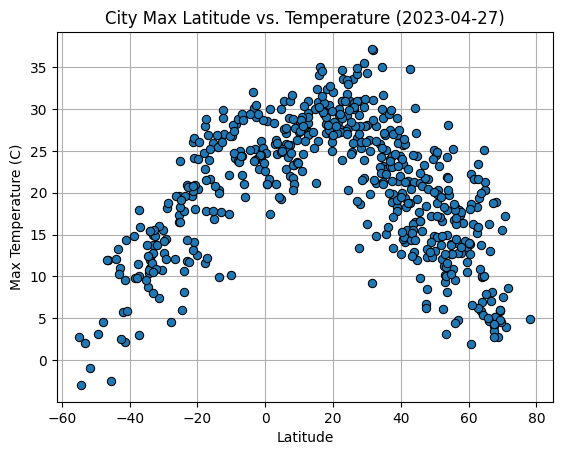

In [22]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-04-27)")
plt.grid()

# Save the figure
plt.savefig("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

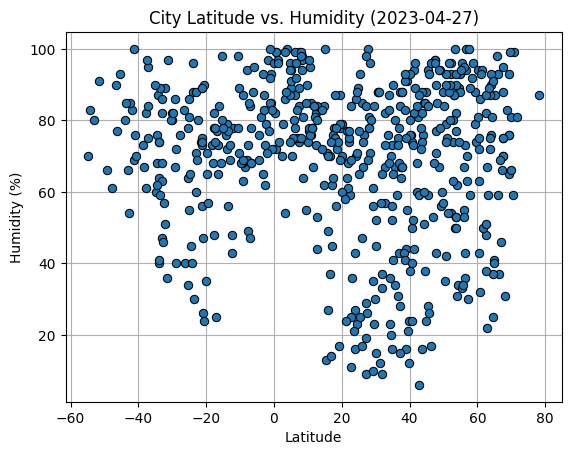

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-04-27)")
plt.grid()

# Save the figure
plt.savefig("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

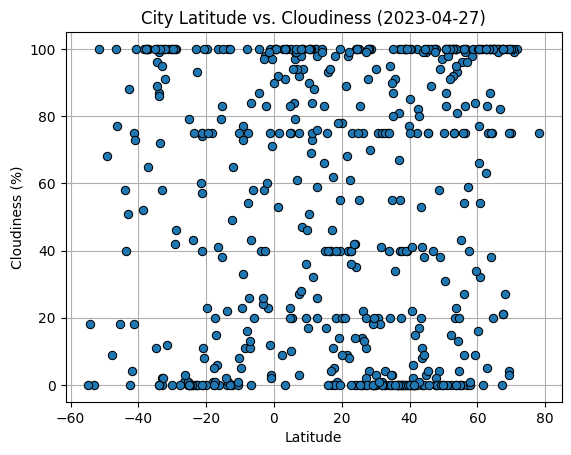

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-04-27)")
plt.grid()

# Save the figure
plt.savefig("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

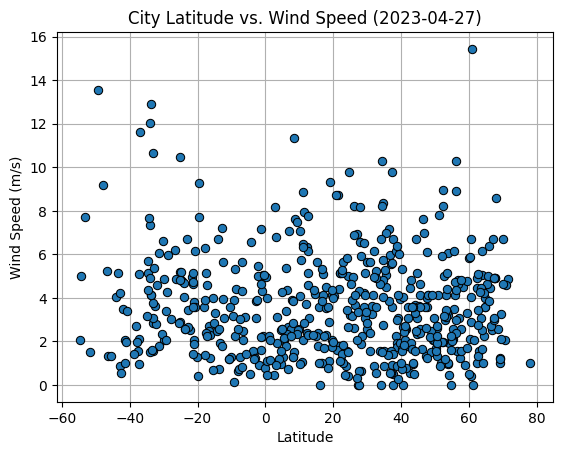

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-04-27)")
plt.grid()

# Save the figure
plt.savefig("\\Users\\Tye Smith\\Bootcamp\\python-api-challenge\\output_data\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tionk essil,12.7856,-16.5217,27.03,83,59,3.07,SN,1687227239
3,flekkefjord,58.2971,6.6607,16.43,92,98,4.52,NO,1687227240
4,hawaiian paradise park,19.5933,-154.9731,25.02,87,100,2.06,US,1687227024
7,masallatah,32.6167,14.0000,21.18,57,0,5.22,LY,1687227241
9,alta sierra,35.7291,-118.5495,15.06,34,34,5.07,US,1687227241


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.85,95,100,11.64,SH,1687227006
1,kasama,-10.2129,31.1808,10.15,71,8,1.30,ZM,1687227238
5,lebu,-37.6167,-73.6500,11.44,82,100,1.57,CL,1687227024
6,puerto natales,-51.7236,-72.4875,-0.93,91,100,1.51,CL,1687227005
8,adamstown,-25.0660,-130.1015,23.78,81,79,10.48,PN,1687227008


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5125096072027167


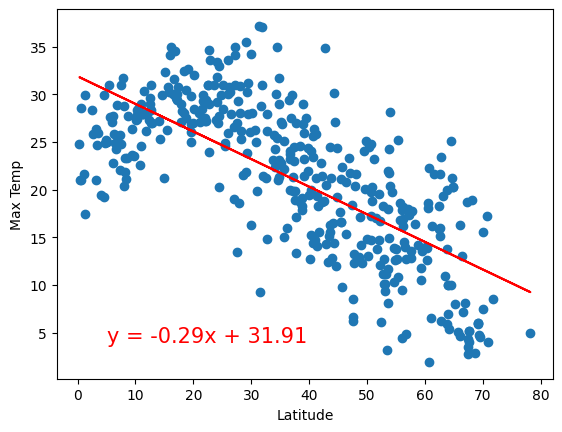

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.6893282395429393


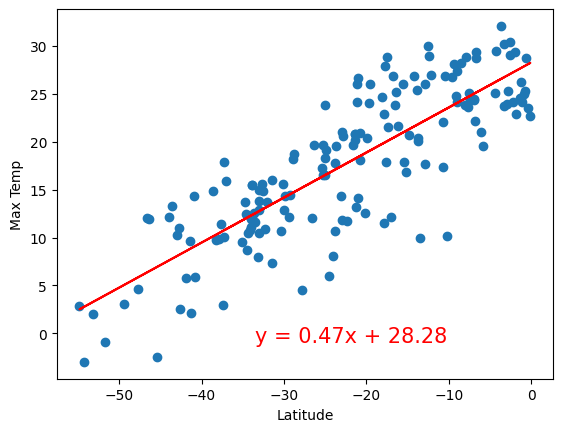

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

Discussion about the linear relationship:

Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation.
The r-value is ~ 0.68
Max temperature drops as the latitude increases.
Southern Hemisphere:

There is a relationship between latitude and max tempuratures
The r-value is ~ 0.67 
Max Temperature increases as Latitude increases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0022283108014875346


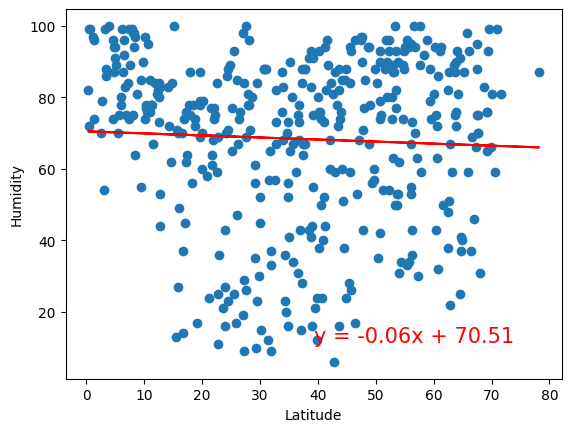

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

The r-value is: 0.0048854750904596175


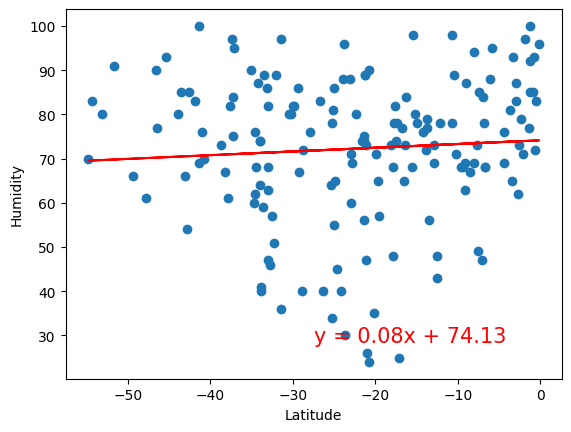

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values, y_values, 0.5, 0.1)

Discussion about the linear relationship: Northern Hemisphere:
There is no correlation between latitude and humidity
The r-value is ~ 0.03 

Southern Hemisphere:
There is no correlation between latitude and humidity
The r-value is ~ 0.3 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003980693512384441


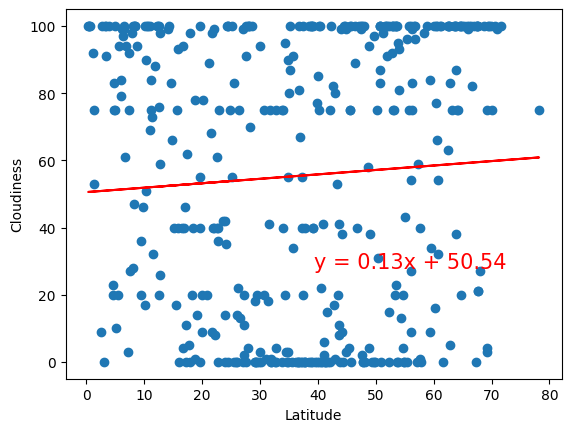

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.009218492203134572


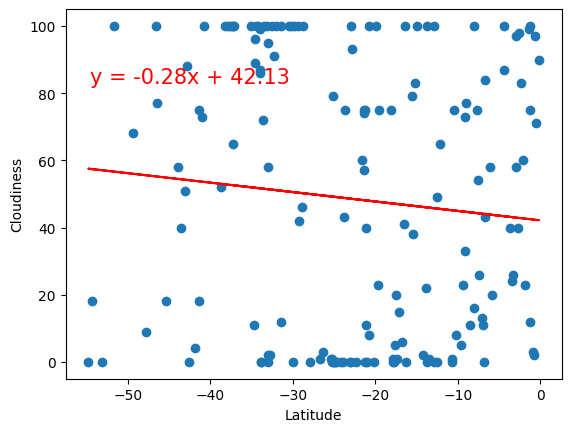

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

Discussion about the linear relationship:

Northern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.00 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.04 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.4537084365636522e-05


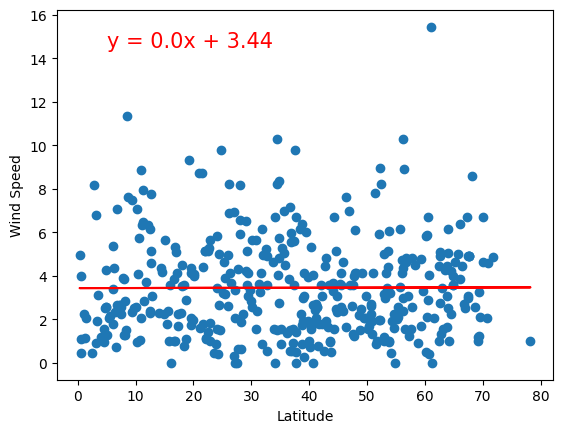

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.04563327511072352


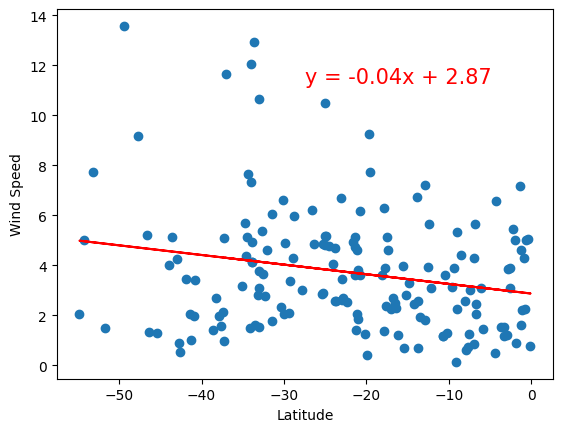

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Discussion about the linear relationship:

Northern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.00 (rounded up)
Southern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is ~ 0.08 (rounded up)